In [7]:
import pandas as pd

ads = pd.read_csv("../Data/Social_Network_Ads.csv")

ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(ads[["Gender", "Age","EstimatedSalary"]], drop_first=True)
y = ads["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Create Models
dt = DecisionTreeClassifier(max_depth=2, min_samples_split=2) 
lr = LogisticRegression(C=3, penalty="l1", solver="saga")
knn = KNeighborsClassifier(n_neighbors=5)

# Fit Models
dt.fit(X_train_std, y_train)
lr.fit(X_train_std, y_train)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [11]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(C=3, penalty="l1", solver="saga")
dt = DecisionTreeClassifier(max_depth=2, min_samples_split=2)
knn = KNeighborsClassifier(n_neighbors=5)

model = VotingClassifier(estimators=[
    ('lr', lr), 
    ('dt', dt),
    ('knn', knn)], 
    voting='soft'
)

model.fit(X_train_std, y_train)
model.score(X_test_std,y_test)

0.875

In [12]:
model.predict_proba(X_test_std)

array([[0.10210648, 0.89789352],
       [0.19587014, 0.80412986],
       [0.90687508, 0.09312492],
       [0.98380534, 0.01619466],
       [0.03279715, 0.96720285],
       [0.09315721, 0.90684279],
       [0.98740781, 0.01259219],
       [0.11472391, 0.88527609],
       [0.98635001, 0.01364999],
       [0.22453707, 0.77546293],
       [0.76066231, 0.23933769],
       [0.81705073, 0.18294927],
       [0.97769044, 0.02230956],
       [0.21503401, 0.78496599],
       [0.98531334, 0.01468666],
       [0.17039742, 0.82960258],
       [0.06938329, 0.93061671],
       [0.04287471, 0.95712529],
       [0.03632196, 0.96367804],
       [0.81487832, 0.18512168],
       [0.15606599, 0.84393401],
       [0.98550876, 0.01449124],
       [0.96944753, 0.03055247],
       [0.18621056, 0.81378944],
       [0.87536512, 0.12463488],
       [0.30455849, 0.69544151],
       [0.75106806, 0.24893194],
       [0.0326292 , 0.9673708 ],
       [0.10536129, 0.89463871],
       [0.9609216 , 0.0390784 ],
       [0.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Create Models
dt = DecisionTreeClassifier(max_depth=2, min_samples_split=2) 
lr = LogisticRegression(C=3, penalty="l1", solver="saga")
knn = KNeighborsClassifier(n_neighbors=5)

model = VotingClassifier(estimators=[
    ('lr', lr), 
    ('dt', dt),
    ('knn', knn)], 
    voting='soft'
)

model.fit(X_train_std, y_train)
model.score(X_test_std,y_test)

0.875

In [14]:
knn = knn.fit(X_train_std, y_train)


In [15]:
model.predict_proba(X_test_std)[:5]

array([[0.10211241, 0.89788759],
       [0.19586761, 0.80413239],
       [0.9068781 , 0.0931219 ],
       [0.98380368, 0.01619632],
       [0.03279862, 0.96720138]])

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2023)

rf.fit(X_train, y_train)

print(f"Training Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")

Training Accuracy: 0.996875
Test Accuracy: 0.8375


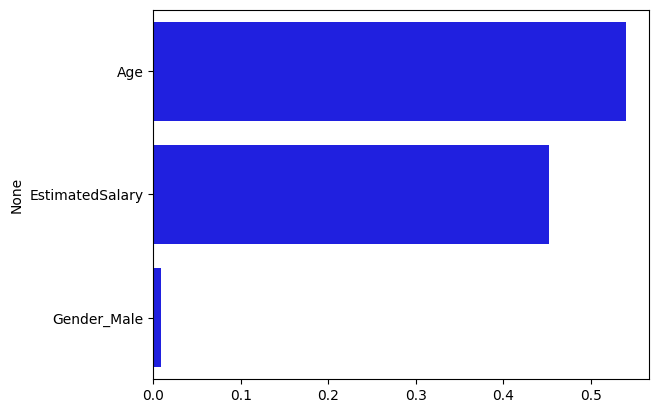

In [17]:
import seaborn as sns

sns.barplot(x=rf.feature_importances_, y=X.columns, color="blue");

In [18]:
rf.feature_importances_

array([0.53978492, 0.45165151, 0.00856358])

In [19]:
import numpy as np
np.arange(start=100, stop=1100, step=100)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [20]:
import numpy as np
from sklearn.model_selection import GridSearchCV



rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100]    
}

grid = GridSearchCV(rf, params)

grid.fit(X_train, y_train)

grid.best_params_

KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(
    random_state=2023,
    n_estimators=200,
    max_features="sqrt",
    bootstrap=False,
    max_samples=None,
    max_depth=4,
    min_samples_leaf=10
)

rf.fit(X_train, y_train)

print(f"Training Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")

In [ ]:
rf.feature_importances_

In [ ]:
sns.barplot(x=rf.feature_importances_, y=X.columns, color="blue")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
      
rf = RandomForestClassifier(random_state=2023)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100]    
}

grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
      
rf = RandomForestClassifier(random_state=2023)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100]    
}

grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

In [ ]:
#!conda install shap --y

In [ ]:
import shap

explainer = shap.Explainer(rf, X_test.sample(50, random_state=12345))

shap_values = explainer(X_test.sample(50, random_state=12345))

shap.plots.beeswarm(shap_values[:,:,1])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    random_state=2023,
    'n_estimators': 100,
    'learning_rate': .01,
    'max_features': "sqrt",
    'subsample': 1.0,
    'max_depth': 3,
    'min_samples_leaf': 1
)

gb.fit(X_train, y_train)

print(f"Training Accuracy: {gb.score(X_train, y_train)}")
print(f"Test Accuracy: {gb.score(X_test, y_test)}")

In [ ]:
gb = GradientBoostingClassifier(
    random_state=2023,
    'n_estimators': 100,
    'learning_rate': .01,
    'max_features': "sqrt",
    'subsample': 1.0,
    'max_depth': 3,
    'min_samples_leaf': 1
)

In [ ]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
      
gb = GradientBoostingClassifier(random_state=2023)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'learning_rate': [.001, .01, .1, .2],
    'max_features': [None, "sqrt"],
    'subsample': [.8, .9, 1.0],
    'max_depth': np.arange(start=3, stop=12, step=2),
    'min_samples_leaf': [2, 5, 10]    
}

grid = RandomizedSearchCV(
    gb, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

In [ ]:
import numpy as np

from sklearn.model_selection import GridSearchCV
      
gb = GradientBoostingClassifier(random_state=2023)

params = {
    'n_estimators': np.arange(start=350, stop=450, step=10),
    'learning_rate': [.005, .01, .015, .25],
    'max_features': [None, "sqrt"],
    'subsample': [.9, .95, 1.0],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]    
}

grid = GridSearchCV(
    gb, 
    params,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    **grid.best_params_,
    random_state=2023
)

gb.fit(X_train, y_train)

print(f"Training Accuracy: {gb.score(X_train, y_train)}")
print(f"Test Accuracy: {gb.score(X_test, y_test)}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    learning_rate=.01,
    max_depth=3,
    max_features=None,
    min_samples_leaf=2,
    n_estimators=350,
    subsample=.95,
    random_state=2023
)

gb.fit(X_train, y_train)

print(f"Training Accuracy: {gb.score(X_train, y_train)}")
print(f"Test Accuracy: {gb.score(X_test, y_test)}")

In [ ]:
X_test["Gender_Male"] = X_test["Gender_Male"].astype("int")

In [ ]:
import shap

# Pass fitted model into shap's Explainer Function
explainer = shap.Explainer(gb, X_test)

# Pass in data to calculate SHAP values for - often just want a sample
shap_values = explainer(X_test.sample(80, random_state=2023))

# shap_values is an array - creating DataFrame so we can view column names
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

shap_df.head()

In [ ]:
shap.plots.waterfall(shap_values[1])

In [ ]:
shap.plots.force(
    base_value=shap_values.base_values,
    shap_values=shap_values.values, 
    features=X_test,
)

In [ ]:
shap.plots.scatter(
    shap_values[:, 1], # plot salary in X
    color=shap_values[:, 0] # color by age
)

In [ ]:
shap.plots.beeswarm(shap_values)